In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

from pathlib import Path

In [2]:
FIGURES_DIR = Path("figures") / Path("datasets-cls-dist")
FIGURES_DIR.mkdir(exist_ok=True, parents=True)

SHORT_LABELS = ["osoba", "miasto", "kraj", "O"]

In [3]:
LEAST_CONF_MDIR = "../runs/test_threshold_least_confidence_50i_50n_kpwr_1670695943f865506/models"
LEAST_CONF_MNAMES = [
    "model_14it_1020spans.spacy",
    "model_27it_2016spans.spacy",
    "model_41it_3040spans.spacy",
    "model_51it_3812spans.spacy"
]
LEAST_CONF_CLS_DISTRIB = [
    {"nam_liv_person": 581, "nam_loc_gpe_city": 234, "nam_loc_gpe_country": 205},
    {"nam_liv_person": 1129, "nam_loc_gpe_city": 475, "nam_loc_gpe_country": 412},
    {"nam_liv_person": 1690, "nam_loc_gpe_city": 746, "nam_loc_gpe_country": 604},
    {"nam_liv_person": 2130, "nam_loc_gpe_city": 942, "nam_loc_gpe_country": 740}
]

In [4]:
def shorten(label):
    if label == "nam_liv_person":
        return "osoba"
    if label == "nam_loc_gpe_city":
        return "miasto"
    if label == "nam_loc_gpe_country":
        return "kraj"

## Class distribution in gradually expanding dataset

581
lconf_model_14it_1020spans.spacy


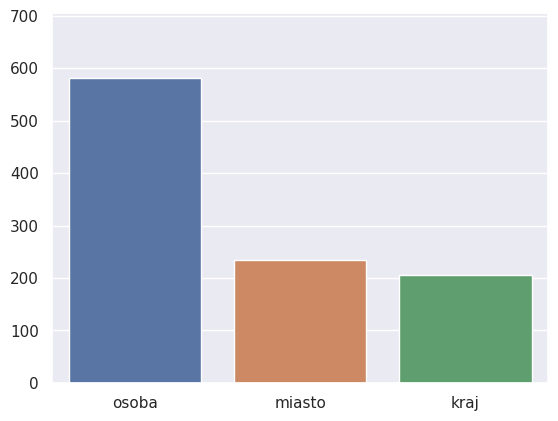

1129
lconf_model_27it_2016spans.spacy


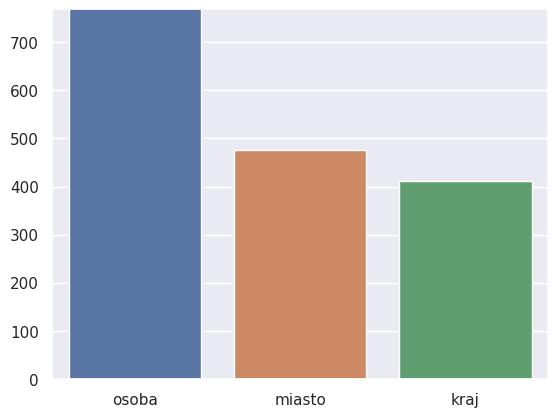

1690
lconf_model_41it_3040spans.spacy


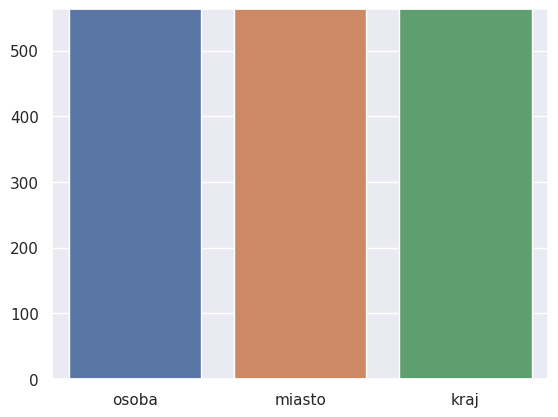

2130
lconf_model_51it_3812spans.spacy


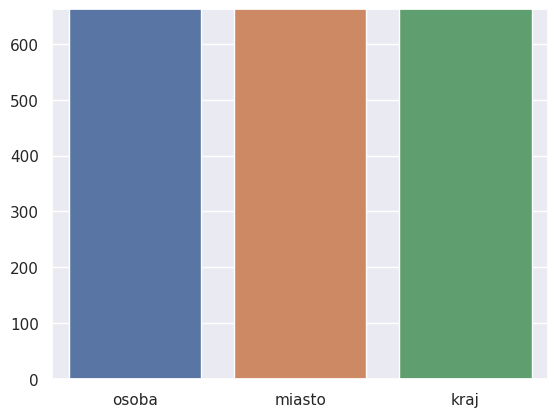

In [5]:
sns.set(font_scale=1)
for i, (lconf_mname, lconf_cls_dist) in enumerate(zip(LEAST_CONF_MNAMES, LEAST_CONF_CLS_DISTRIB)):
    lconf_classes = list([shorten(label) for label in lconf_cls_dist.keys()])
    lconf_counts = list(lconf_cls_dist.values())
    lconf_bar = sns.barplot(x=lconf_classes, y=lconf_counts)

    if i == 0:
        max_in_rand = 641
    elif i == 1:
        max_in_rand = 699
    elif i == 2:
        max_in_rand = 512
    elif i == 3:
        max_in_rand = 602

    print(max(lconf_counts))
    plt.ylim(0, max_in_rand + (0.1*max_in_rand))
    
    # plt.tick_params(left = False , labelleft = False)

    plt.savefig(FIGURES_DIR / f"03_threshold_pl_lconf_class_distribution_{lconf_mname}.svg")
    print("lconf_" + lconf_mname)
    plt.show()
